<a href="https://colab.research.google.com/github/Geeth-Rath/A-ML/blob/main/258417X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#0b486b">Data Science Concepts</span>

---

---

## <span style="color:#0b486b">Practical Session : Plots</span>

**The purpose of this session is to teach you:**

1. How to draw and manipulate
    1. Pie chart
    2. Wordcloud
    3. Bar charts
    4. step chart
    5. histogram
    6. boxplot
    7. scatter plot
2. Pearson-r correlation coefficient
3. Spearman's rank coefficient
---

You have already been thought about different sorts of plots, how they help to get a better understanding of the data, and when to use which. In this practical session we will work with `matplotlib` package to learn more about plotting in Python.

In [ ]:
import numpy as np
import csv

import matplotlib.pyplot as plt
%matplotlib inline

## <span style="color:#0b486b">1. Pie Chart</span>

Suppose you have the frequency count of a variable (e.g. hair_colour). Draw a pie chart to explain it.

([<matplotlib.patches.Wedge at 0x7b4fbc747e90>,
 [Text(-1.1, 1.3471114790620887e-16, 'Black'),
  Text(0.9708204196655013, -0.7053422663930613, 'Red'),
  Text(0.6465637025335375, 0.8899187482945414, 'Brown')],
 [Text(-0.6, 7.347880794884119e-17, '50.0'),
  Text(0.5663119114715424, -0.41144965539595235, '30.0'),
  Text(0.3526711104728386, 0.4854102263424771, '20.0')])

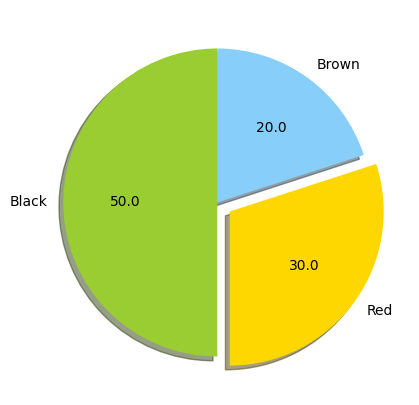

In [ ]:
labels = ['Black', 'Red', 'Brown']

# frequency count
hair_colour_freq = [5, 3, 2]  # Black, Red, Brown

# colours
colours = ['yellowgreen', 'gold', 'lightskyblue']

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(hair_colour_freq, colors=colours, labels=labels, shadow=True,
       explode=(0, 0.1, 0), startangle=90, autopct="%1.1f")

What if we have too many tags and sectors?

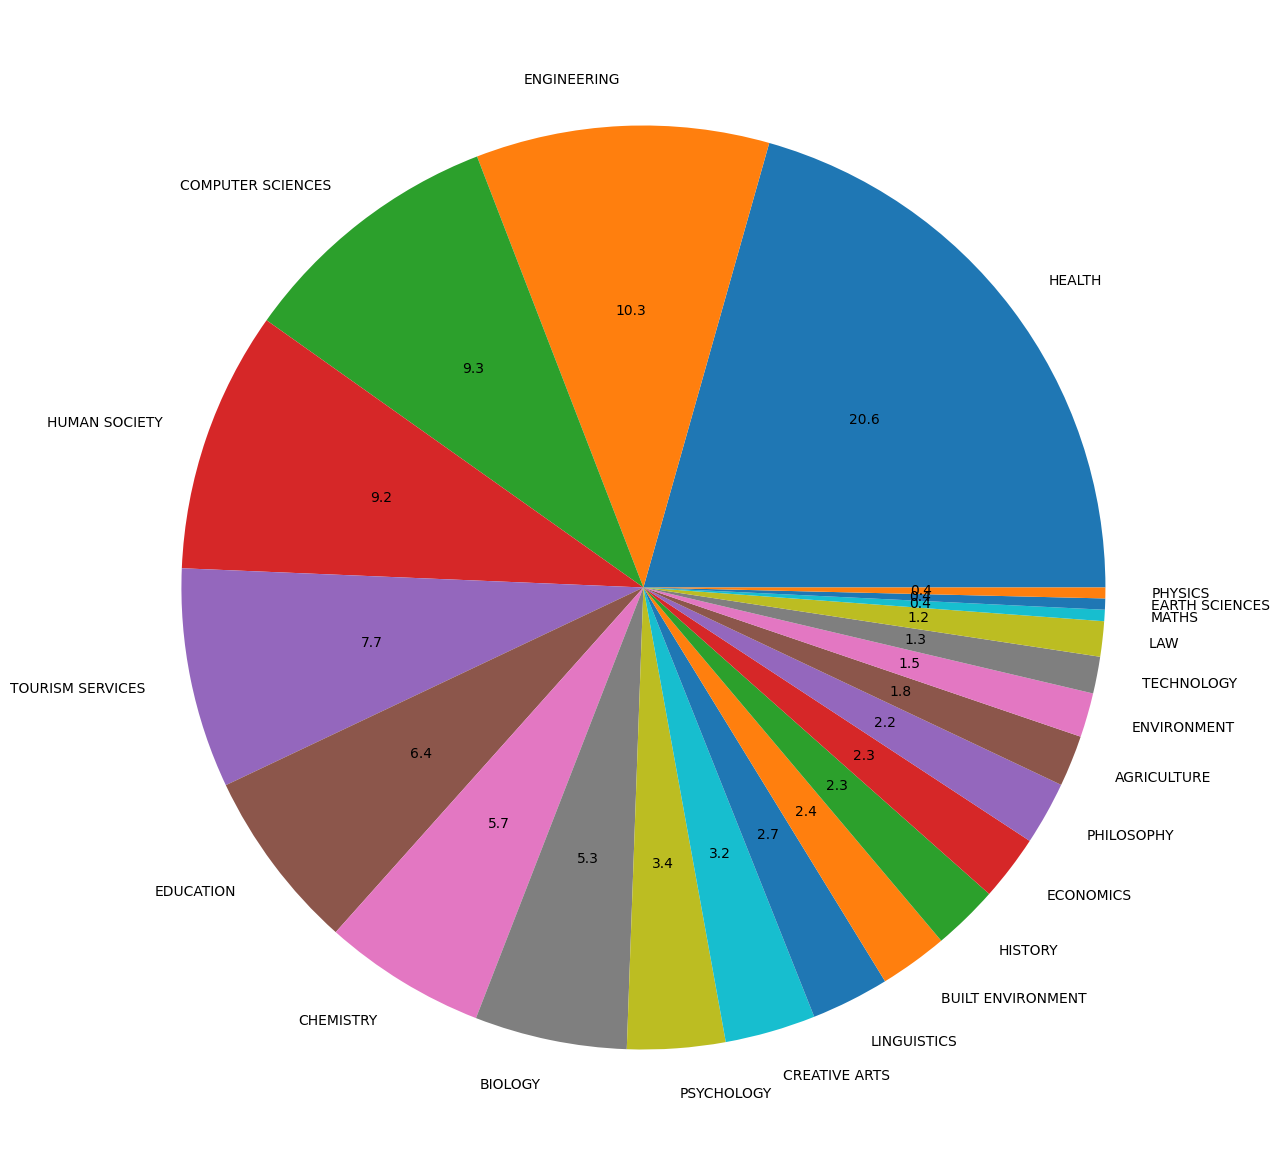

In [ ]:
# Excellence in Reasearch Australia
labels = ['HEALTH', 'ENGINEERING', 'COMPUTER SCIENCES', 'HUMAN SOCIETY',
          'TOURISM SERVICES', 'EDUCATION', 'CHEMISTRY', 'BIOLOGY', 'PSYCHOLOGY',
          'CREATIVE ARTS', 'LINGUISTICS', 'BUILT ENVIRONMENT', 'HISTORY',
          'ECONOMICS', 'PHILOSOPHY', 'AGRICULTURE', 'ENVIRONMENT', 'TECHNOLOGY',
          'LAW', 'MATHS', 'EARTH SCIENCES', 'PHYSICS']


# frequency count
xx = [2625.179999, 1306.259999, 1187.039999, 1166.04, 980.8599997, 810.5999998,
      725.6399996, 678.7899998, 436.5999997, 404.3299999, 348.01, 304.33, 294.19,
      293.02, 282.31, 228.21, 197.3399999, 164.0599998, 157, 50.49999998, 49.60999999, 48.08000005]

fig, ax = plt.subplots(figsize=(15, 15))
ax.pie(xx, labels=labels, autopct="%1.1f");

---
## <span style="color:#0b486b">2. Bar Chart</span>

Use the hair colour data to draw a bar chart.

[Text(0, 0, 'Black'), Text(1, 0, 'Red'), Text(2, 0, 'Brown')]

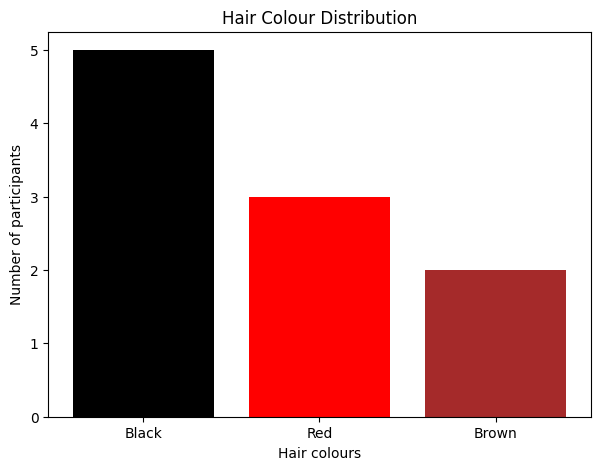

In [ ]:
labels = ['Black', 'Red', 'Brown']
colours = ['black', 'red', 'brown']

hair_colour_freq = [5, 3, 2]
x_pos = np.arange(len(hair_colour_freq))

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x_pos, hair_colour_freq, color=colours, align='center')

ax.set_xlabel("Hair colours")
ax.set_ylabel("Number of participants")
ax.set_title("Hair Colour Distribution")

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

**Exercise:** Now suppose we have the hair colour distribution across genders, so we can plot grouped bar charts. Plot a grouped bar chart to show the distribution of colours acros genders.

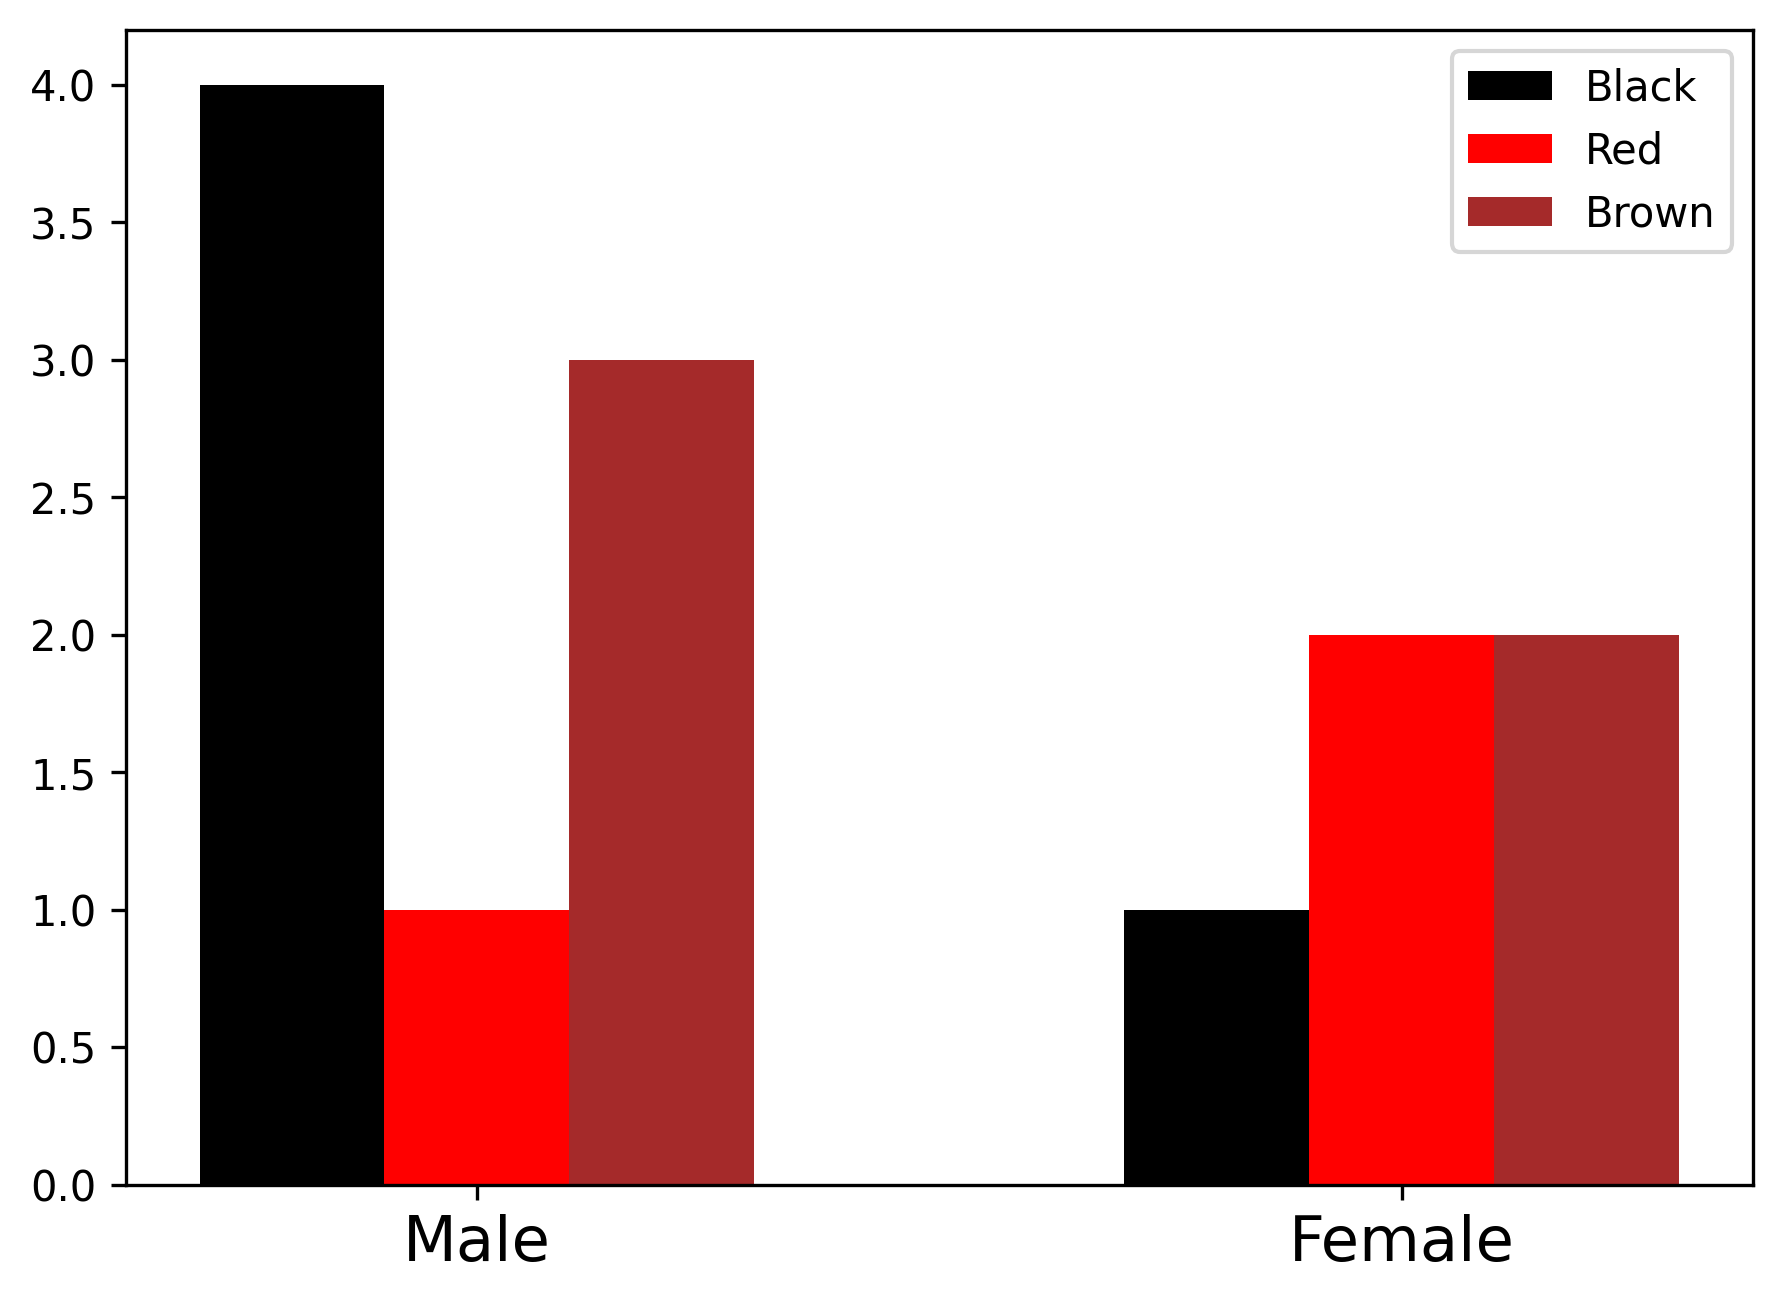

In [ ]:
"""
        black  red  brown
Male      4     1     3
Female    1     2     2

"""

data = np.array([[4, 1, 3],
               [1, 2, 2]])

x_pos = np.arange(2)
width = 0.2

fig, ax = plt.subplots(figsize=(7, 5), dpi=300)
ax.bar(x_pos, data[:, 0], width=width, color='black', align='center', label='Black')
ax.bar(x_pos+width, data[:, 1], width=width, color='red', align='center', label='Red')
ax.bar(x_pos+2*width, data[:, 2], width=width, color='brown', align='center', label='Brown')

labels = ['Male', 'Female']
ax.set_xticks(x_pos + width)
ax.set_xticklabels(labels, size=15)

ax.legend()




**Exercise:** Can we plot it more intelligently? We are doing the same thing multiple times! Is it a good idea to use a loop?

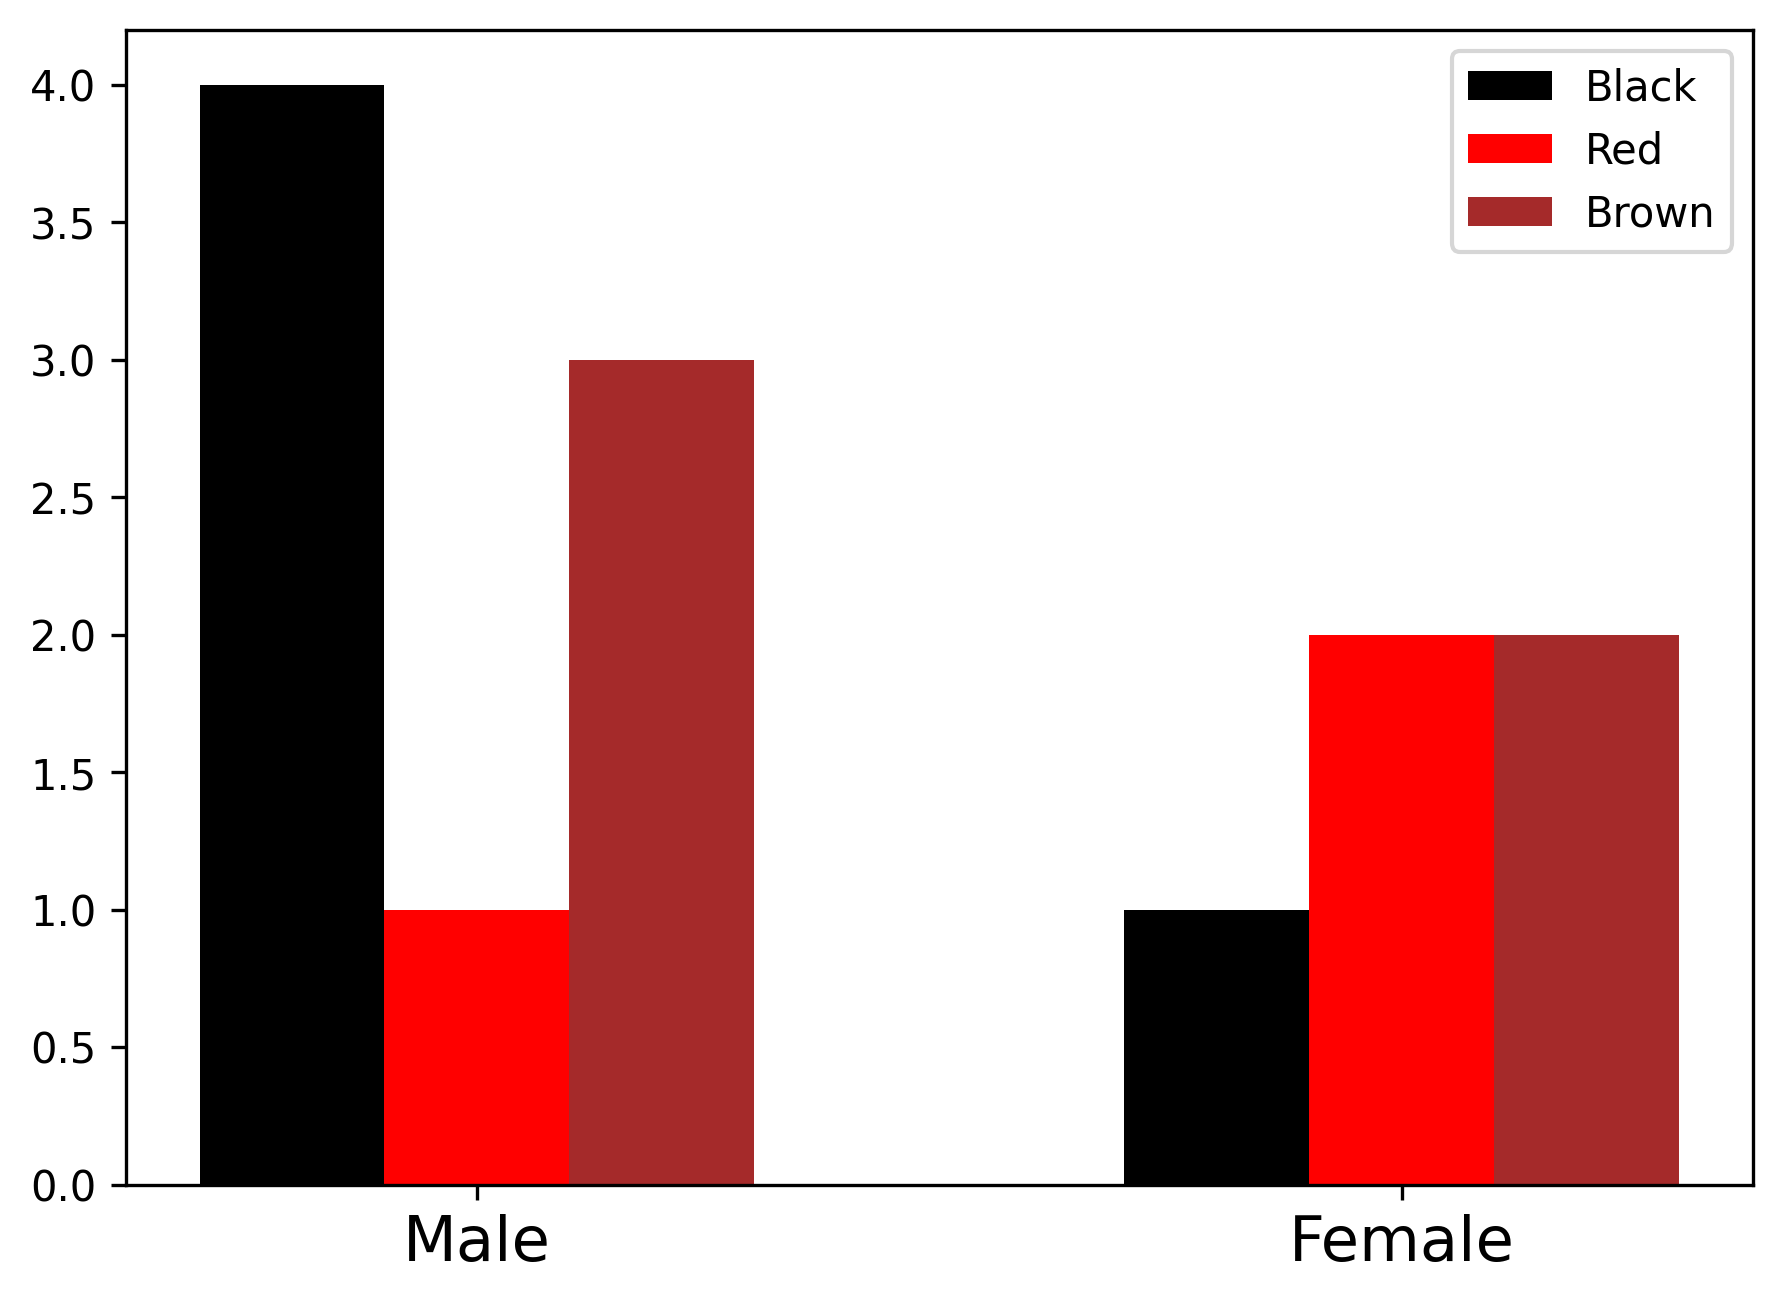

In [ ]:
"""
        black  red  brown
Male      4     1     3
Female    1     2     2

Insert your code here
"""

data = np.array([[4, 1, 3],
               [1, 2, 2]])

x_pos = np.arange(2)
width = 0.2
colors = ['black', 'red', 'brown']
labels = ['Black', 'Red', 'Brown']

fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

for i, color in enumerate(colors):
    ax.bar(x_pos + i * width, data[:, i], width=width, color=color,
           align='center', label=labels[i])

gender_labels = ['Male', 'Female']
ax.set_xticks(x_pos + width)
ax.set_xticklabels(gender_labels, size=15)

ax.legend()




**Exercise:** What if we want to group the bar charts based on the hair colour?

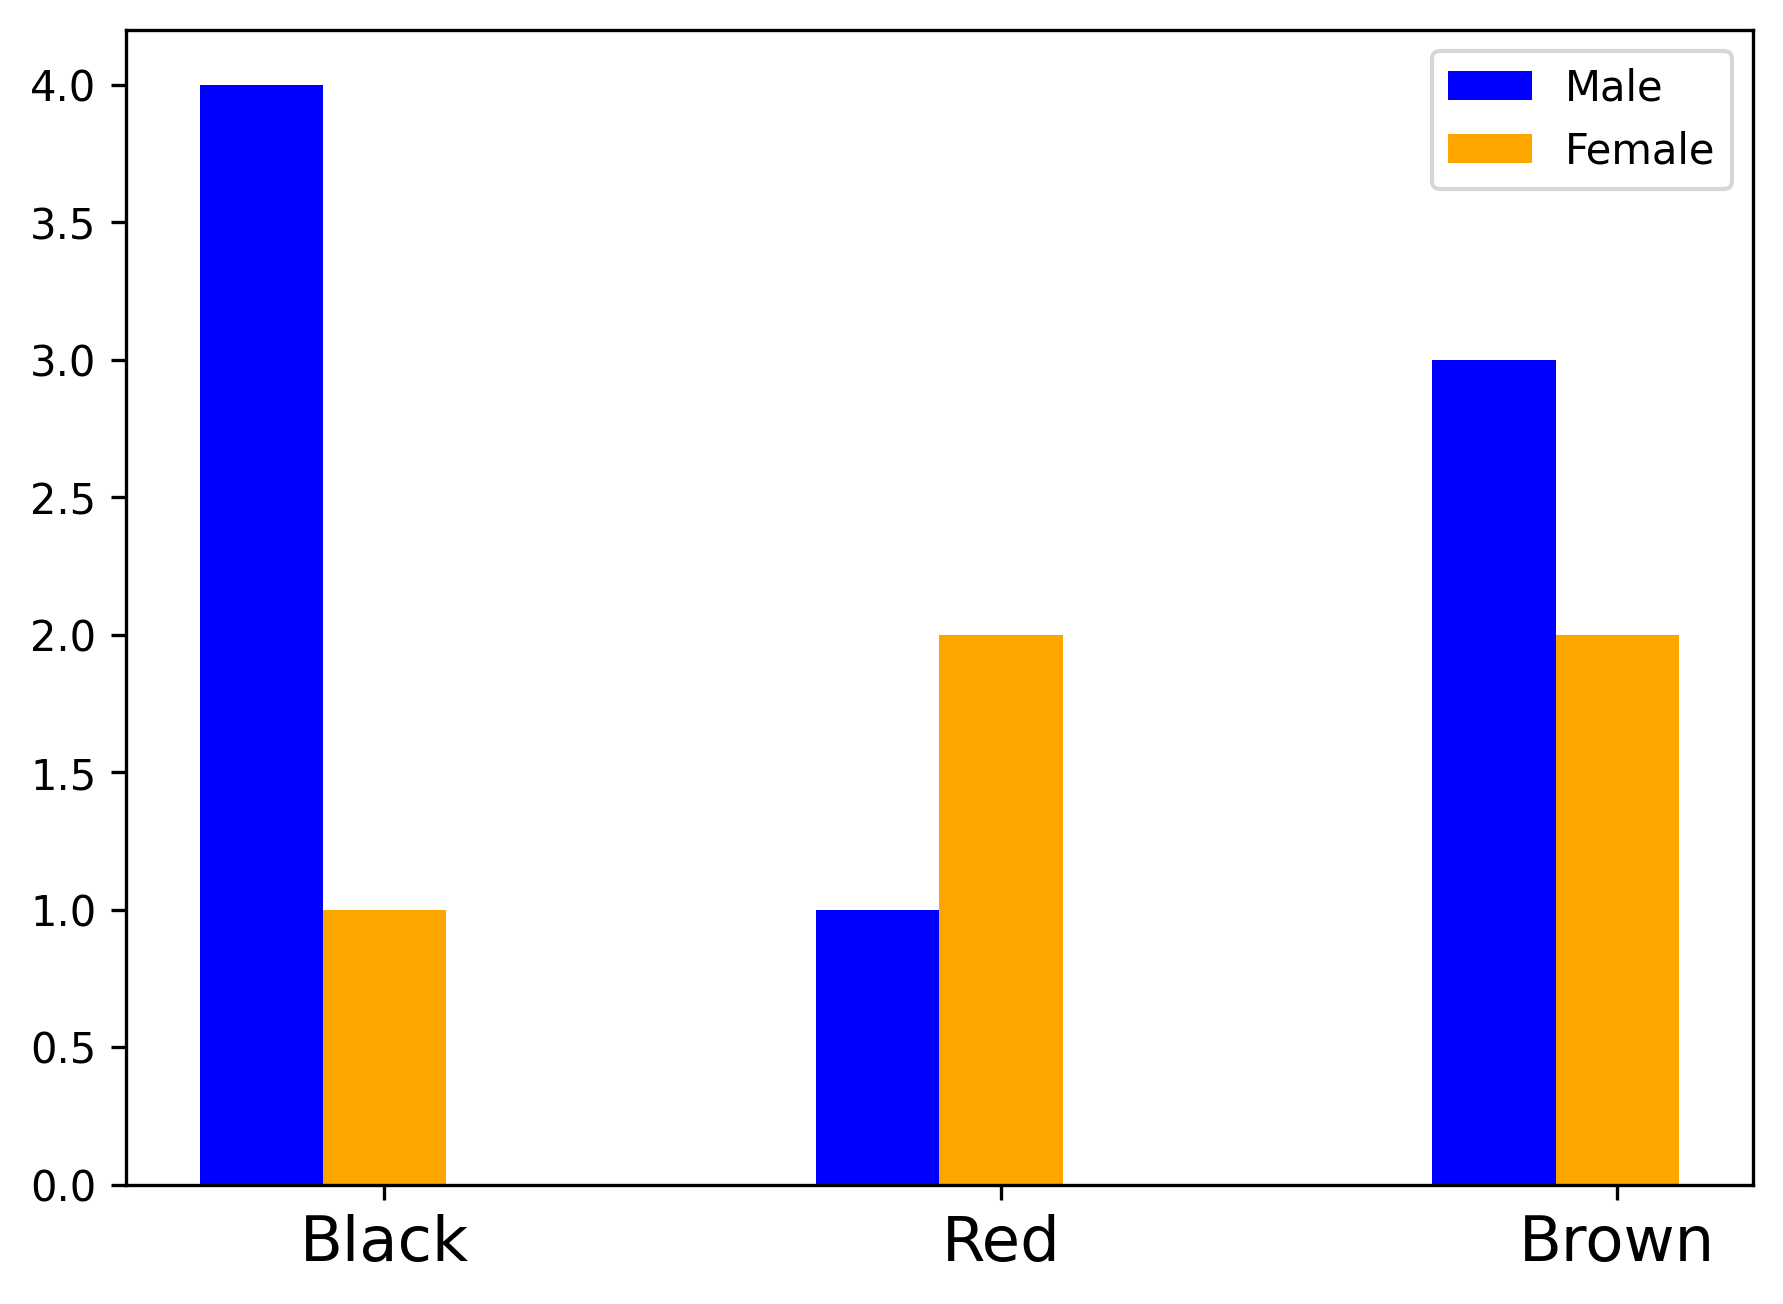

In [ ]:
"""
        black  red  brown
Male      4     1     3
Female    1     2     2

Insert your code here
"""

data = np.array([[4, 1, 3],
               [1, 2, 2]])

x_pos = np.arange(3)
width = 0.2
colors = ['blue', 'orange']
labels = ['Male', 'Female']


fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

for i, color in enumerate(colors):
    ax.bar(x_pos + i * width, data[i, :], width=width, color=color,
           align='center', label=labels[i])


hair_color_labels = ['Black', 'Red', 'Brown']
ax.set_xticks(x_pos + width)
ax.set_xticklabels(hair_color_labels, size=15)

ax.legend()

plt.show()


#### Stacked bar chart

**Exercise:** The other type of bar chart is stacked bar chart. Draw a stacked bar plot of the hair colour data grouped on hair colours.

<BarContainer object of 3 artists>

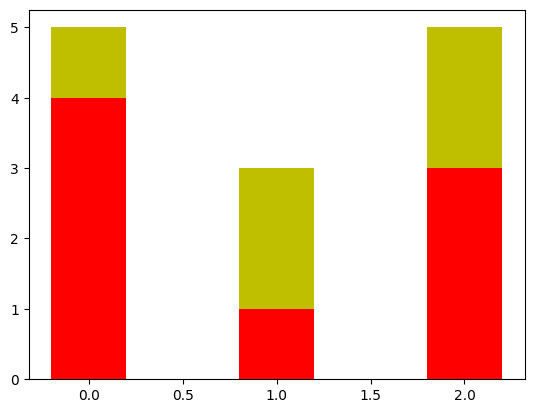

In [ ]:
"""
        black  red  brown
Male      4     1     3
Female    1     2     2

"""

labels = ['Black', 'Red', 'Brown']
data = np.array([[4, 1, 3],
                 [1, 2, 2]])

n_groups, n_colours = data.shape
x_pos = np.arange(n_colours)
width = 0.4

fig, ax = plt.subplots()

ax.bar(x_pos, data[0, :], color='r', width=width, align='center', label='Male')
ax.bar(x_pos, data[1, :], color='y', bottom=data[0, :], width=width, align='center', label='Female')




**Exercise:** Draw a stacked bar plot grouped on the gender.

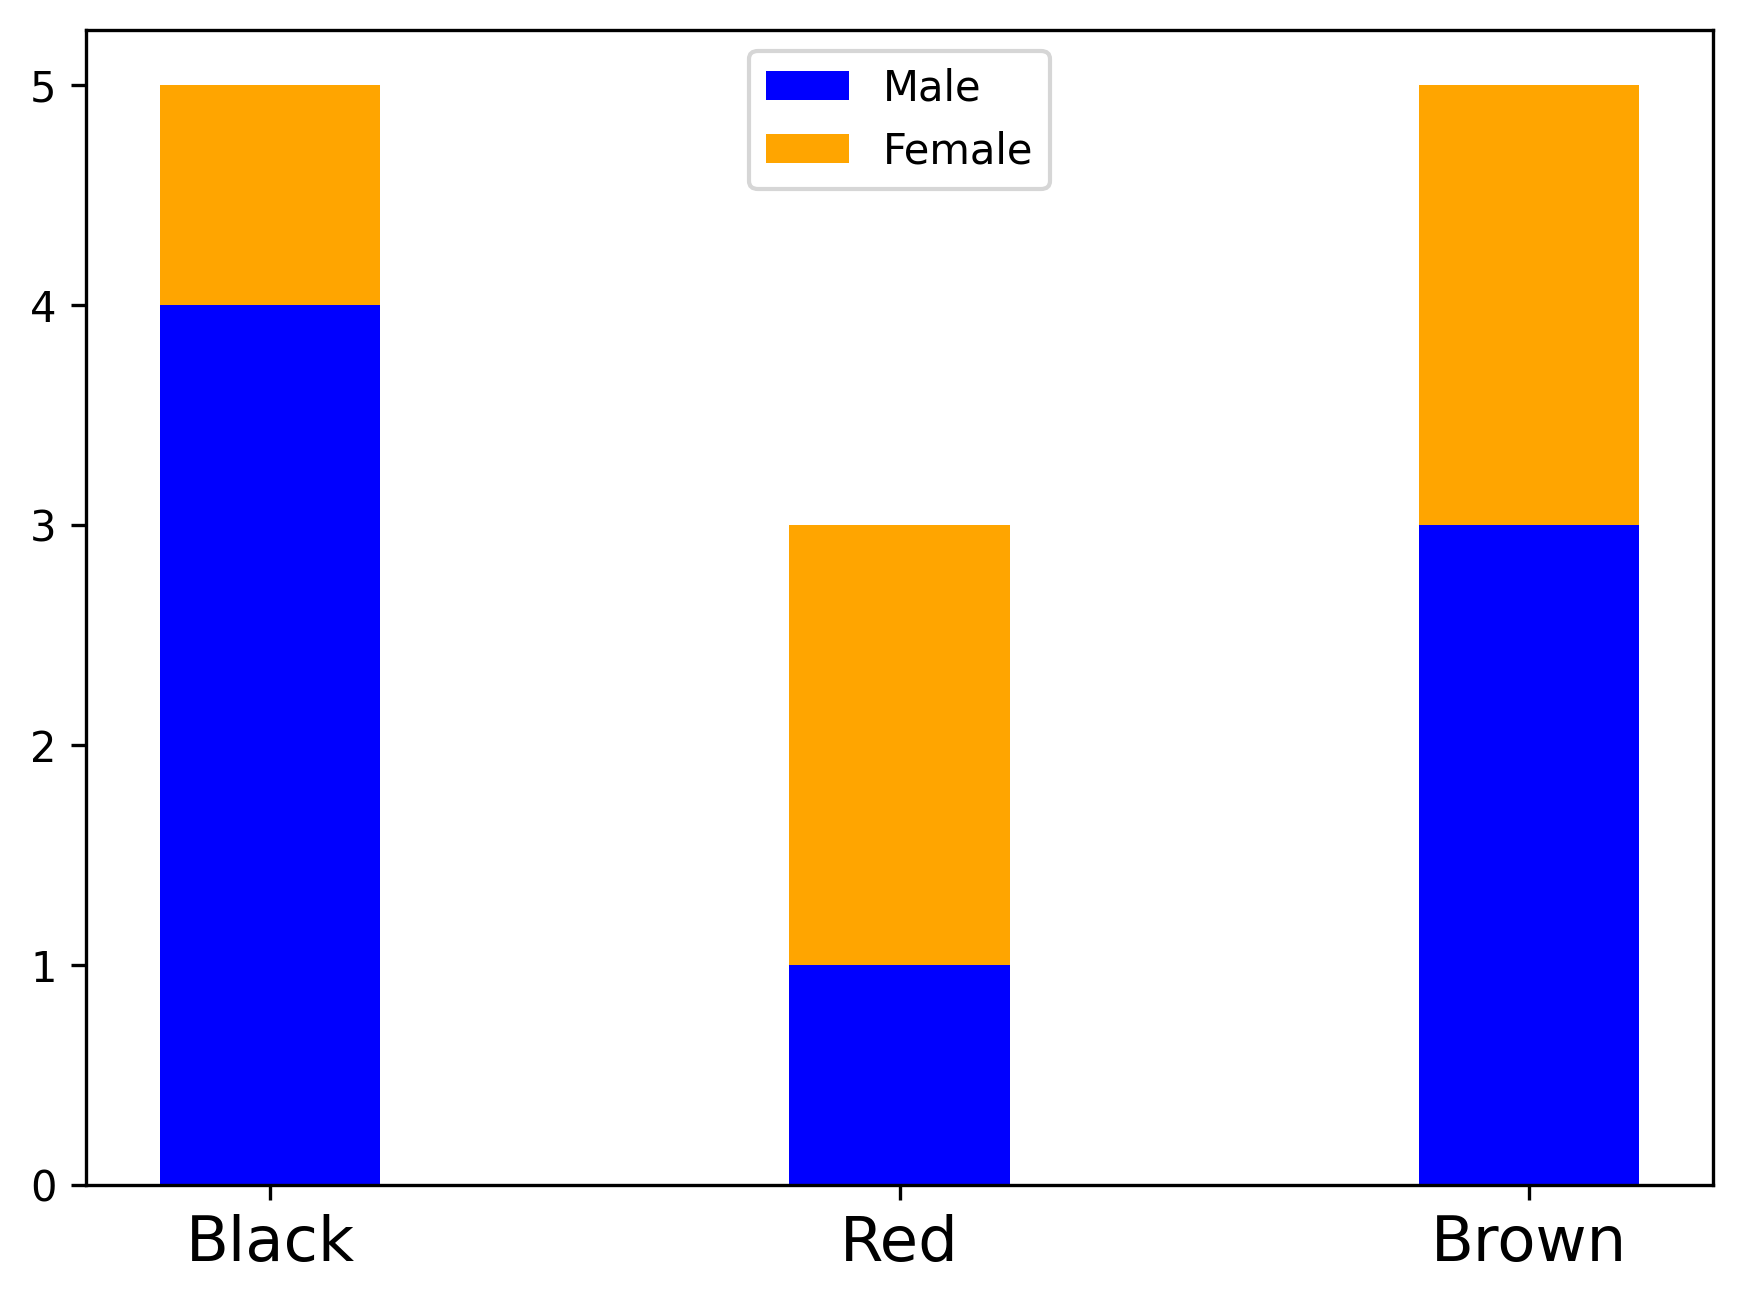

In [ ]:
"""
        black  red  brown
Male      4     1     3
Female    1     2     2

"""


data = np.array([[4, 1, 3],
               [1, 2, 2]])

labels = ['Black', 'Red', 'Brown']
gender_labels = ['Male', 'Female']
colors = ['blue', 'orange']

width = 0.35


x_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(7, 5), dpi=300)


ax.bar(x_pos, data[0, :], width=width, color=colors[0], label=gender_labels[0])
ax.bar(x_pos, data[1, :], width=width, color=colors[1], bottom=data[0, :], label=gender_labels[1])


ax.set_xticks(x_pos)
ax.set_xticklabels(labels, size=15)


ax.legend()


plt.show()

### subplots

**Exercise:** Use subplots to draw two graphs next to each other

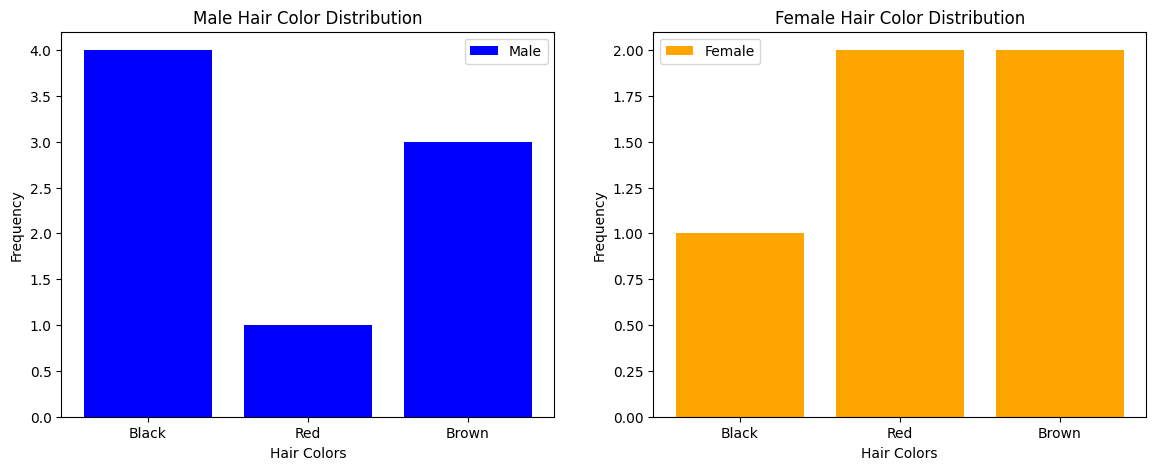

In [ ]:
labels = ['Black', 'Red', 'Brown']
male_freq = [4, 1, 3]
female_freq = [1, 2, 2]
x_pos = np.arange(len(labels))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# 1. Plot bar charts for the first and second subplots
ax[0].bar(x_pos, male_freq, color='blue', align='center')  # Male frequencies
ax[1].bar(x_pos, female_freq, color='orange', align='center') # Female frequencies

# 2. Set xlabel, ylabel, and title for each subplot
ax[0].set_xlabel("Hair Colors")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Male Hair Color Distribution")

ax[1].set_xlabel("Hair Colors")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Female Hair Color Distribution")

# 3. Set xtick and xticklabels for each subplot
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(labels)

ax[1].set_xticks(x_pos)
ax[1].set_xticklabels(labels)

# 4. Set legend for each subplot (optional, as colors already distinguish)
ax[0].legend(['Male'])
ax[1].legend(['Female'])

plt.show()

**Exercise:** What if we have too many groups? Draw a bar chart for the Excellence in Research Australia data.

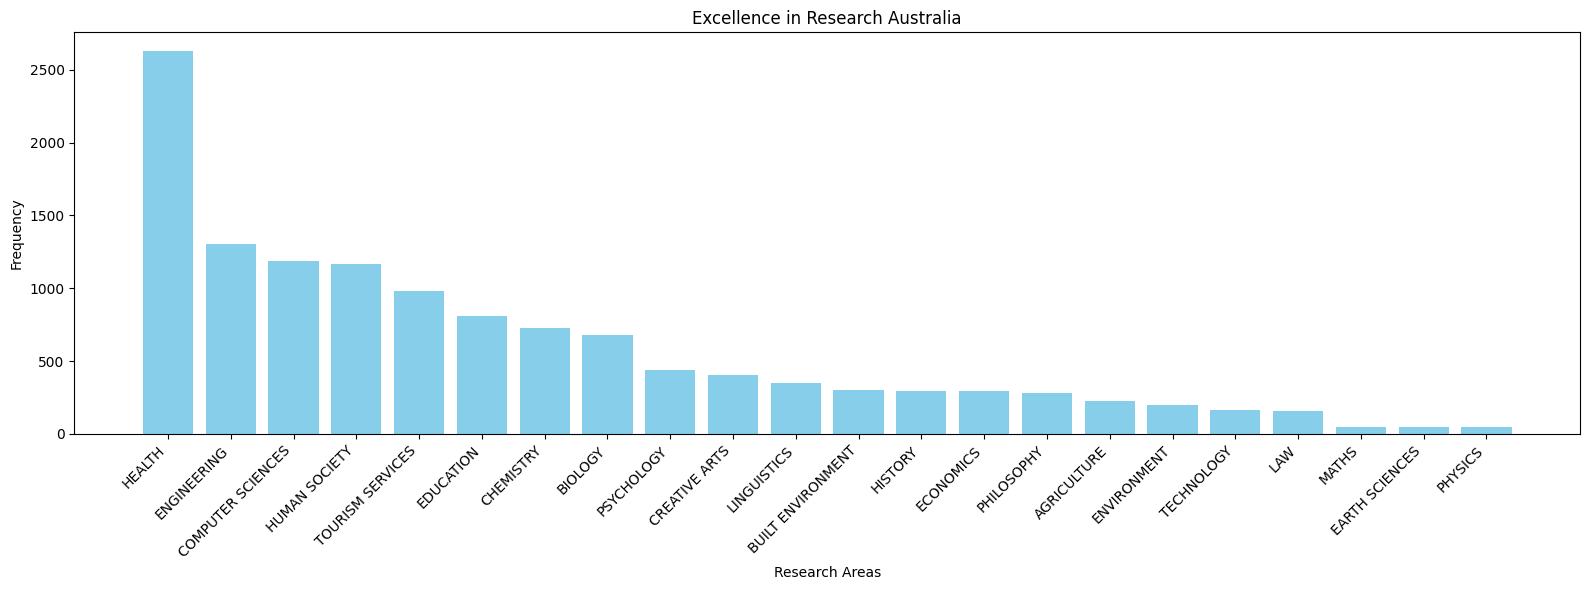

In [ ]:
# Excellence in Reasearch Australia
labels = ['HEALTH', 'ENGINEERING', 'COMPUTER SCIENCES', 'HUMAN SOCIETY',
          'TOURISM SERVICES', 'EDUCATION', 'CHEMISTRY', 'BIOLOGY', 'PSYCHOLOGY',
          'CREATIVE ARTS', 'LINGUISTICS', 'BUILT ENVIRONMENT', 'HISTORY',
          'ECONOMICS', 'PHILOSOPHY', 'AGRICULTURE', 'ENVIRONMENT', 'TECHNOLOGY',
          'LAW', 'MATHS', 'EARTH SCIENCES', 'PHYSICS']


# frequency count
xx = [2625.179999, 1306.259999, 1187.039999, 1166.04, 980.8599997, 810.5999998,
      725.6399996, 678.7899998, 436.5999997, 404.3299999, 348.01, 304.33, 294.19,
      293.02, 282.31, 228.21, 197.3399999, 164.0599998, 157, 50.49999998, 49.60999999, 48.08000005]

# Your code here
fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(labels, xx, color='skyblue')

plt.xticks(rotation=45, ha='right')


ax.set_xlabel("Research Areas")
ax.set_ylabel("Frequency")
ax.set_title("Excellence in Research Australia")

plt.tight_layout()
plt.show()


---
## <span style="color:#0b486b">3. Wordcloud</span>

As you saw, pie-chart is not very helpful when we have too many sectors. It is hard to read and visually ugly. Instead we can use wordcloud representation. A useful tool is [wordclouds.com](http://wordclouds.com).

**Exercise:** Run the cell below, then go to [wordclouds.com](http://wordclouds.com) and use it to create a wordcloud for the output of the cell.

**Note:** Go to the website and choose `File`, click `Paste/Type text` and then paste the text to the box and click `Apply`

In [ ]:
for i in range(len(xx)):
    print("{} {}".format(xx[i], labels[i]))

2625.179999 HEALTH
1306.259999 ENGINEERING
1187.039999 COMPUTER SCIENCES
1166.04 HUMAN SOCIETY
980.8599997 TOURISM SERVICES
810.5999998 EDUCATION
725.6399996 CHEMISTRY
678.7899998 BIOLOGY
436.5999997 PSYCHOLOGY
404.3299999 CREATIVE ARTS
348.01 LINGUISTICS
304.33 BUILT ENVIRONMENT
294.19 HISTORY
293.02 ECONOMICS
282.31 PHILOSOPHY
228.21 AGRICULTURE
197.3399999 ENVIRONMENT
164.0599998 TECHNOLOGY
157 LAW
50.49999998 MATHS
49.60999999 EARTH SCIENCES
48.08000005 PHYSICS


---
## <span style="color:#0b486b">4. Step plot</span>

**Exercise:** Draw a step plot for the seatbelt data provided in the lecture.

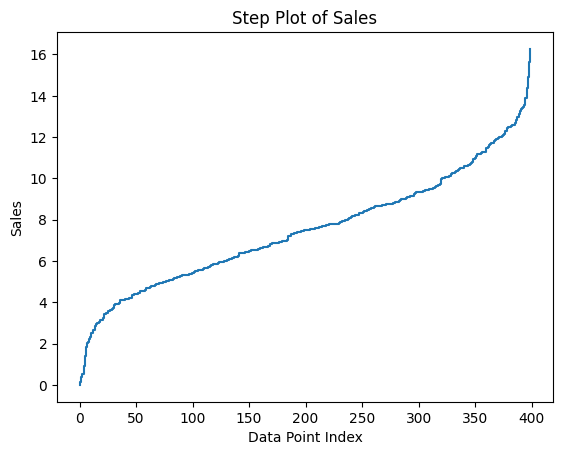

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

carseat_data = pd.read_csv('Carseats.csv')

carseat_data = carseat_data.sort_values(by=['Sales'])

sales_values = carseat_data['Sales'].values


plt.step(range(len(sales_values)), sales_values, where='mid')


plt.xlabel("Data Point Index")
plt.ylabel("Sales")
plt.title("Step Plot of Sales")

plt.show()

In [ ]:
freq = np.array([0, 2, 1, 5, 7])
np.cumsum(freq)

array([ 0,  2,  3,  8, 15])

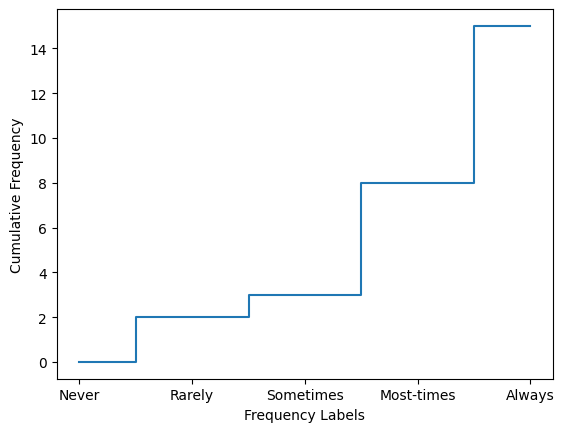

In [ ]:
freq_cumsum = np.cumsum(freq)
labels = ['Never', 'Rarely', 'Sometimes', 'Most-times', 'Always']
x_pos = np.arange(len(freq))

fig, ax = plt.subplots()
ax.step(x_pos, freq_cumsum, where='mid')


# Your code here
# Set xlabel, ylabel, xticks and xticklabels for the figure
ax.set_xlabel("Frequency Labels")
ax.set_ylabel("Cumulative Frequency")
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

plt.show()


---
## <span style="color:#0b486b">5. Histogram</span>

**Exercise:** Draw a histogram of scores on Math test provided in the cell below.

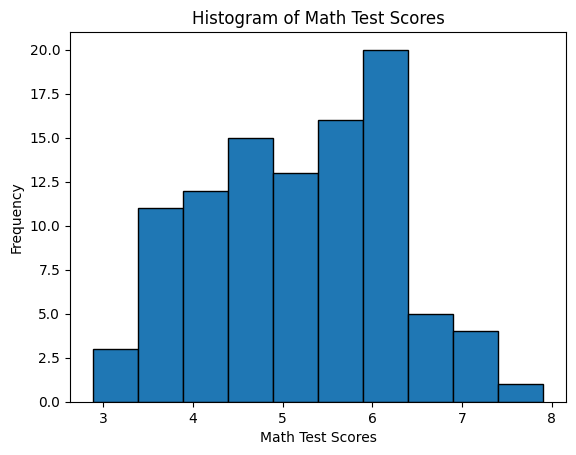

In [ ]:
scores = np.random.normal(loc=5, size=100)

# Your code here
# Draw a histogram of *scores* array
# Hint: you might use numpy.unique, which returns unique scores and their counts.


scores = np.random.normal(loc=5, size=100)

plt.hist(scores, bins=10, edgecolor='black')

plt.xlabel("Math Test Scores")
plt.ylabel("Frequency")
plt.title("Histogram of Math Test Scores")

plt.show()

---
## <span style="color:#0b486b">6. Boxplot</span>
**Exercise:** Draw a box plot for scores on Math test from the previous exercise.

Text(0.5, 1.0, 'Box Plot of Math Test Scores')

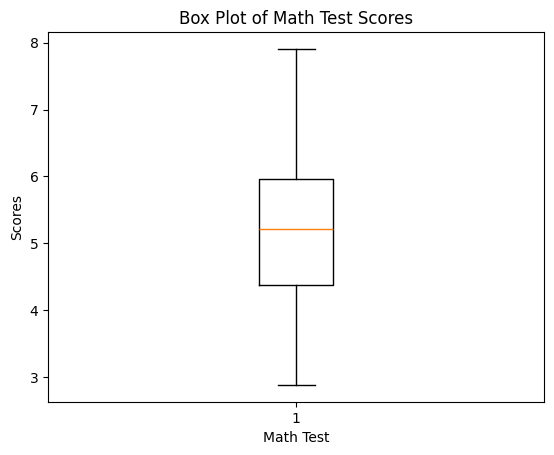

In [ ]:
# Your code here
plt.boxplot(scores)

plt.xlabel("Math Test")
plt.ylabel("Scores")
plt.title("Box Plot of Math Test Scores")

---
## <span style="color:#0b486b">7. Scatter plot</span>

**Exercise:** Draw a scatter plot of the car weights and their fuel consumption as displayed in the lecture.

In [ ]:
# Read the data
datafile = "Auto.csv"
data = np.genfromtxt(datafile, delimiter=',')
data = []
with open(datafile, 'r') as fp:
    reader = csv.reader(fp, delimiter=',')
    for row in reader:
        data.append(row)

miles = [float(dd[1]) for dd in data[1:]]
weights = [float(dd[5]) for dd in data[1:]]

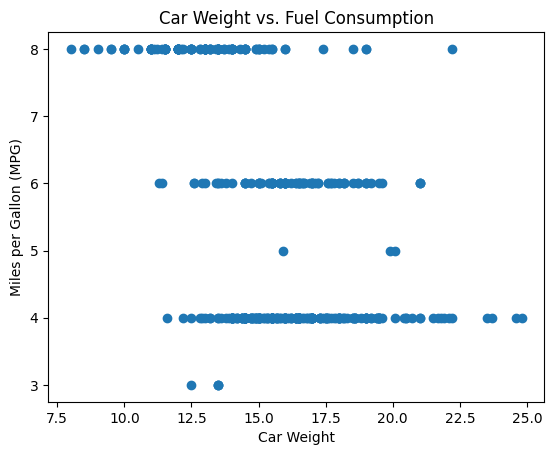

In [ ]:
# Your code here
# Draw a scatter plot of the 2 arrays: weights and miles from the previous code cell
import numpy as np
import matplotlib.pyplot as plt
import csv

plt.scatter(weights, miles)

plt.xlabel("Car Weight")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Car Weight vs. Fuel Consumption")

plt.show()

---
## <span style="color:#0b486b">8. Pearson's-r Correlation coefficinet</span>


We assume $X=\left\{ X_{1},\ldots,X_{n}\right\}$ and $Y=\left\{ Y_{1},\ldots,Y_{n}\right\}$. Then Pearson-r correlation coefficient is defined as
$$ \rho(X,Y) = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} =  \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2} \sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}} $$


**Exercise:** Use the car data and find the Pearson's-r correlation coefficient between car weights and fuel consumption.

In [ ]:
# Your code here
# find the Pearson's-r correlation coefficient between
# ... the two arrays weights and miles from previous section.
import scipy.stats

correlation_coefficient = scipy.stats.pearsonr(weights, miles)[0]

print("Pearson's-r correlation coefficient:", correlation_coefficient)

Pearson's-r correlation coefficient: -0.5046833793486442


**Exercise:** Find the Pearson's-r coefficient for two linearly dependent variables. Add some noise and see the effect of varying the noise. What is positive correlation? What is negative correlation?

Pearson's-r correlation coefficient: 0.8872178970563898


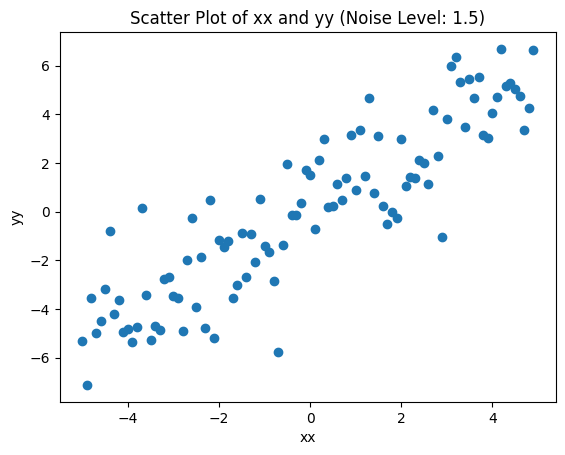

Noise Level: 0.5, Correlation Coefficient: 0.9902866545530189


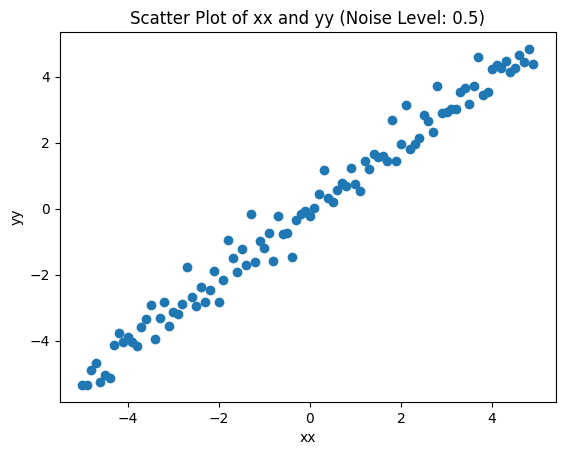

Noise Level: 1.0, Correlation Coefficient: 0.9405386353156602


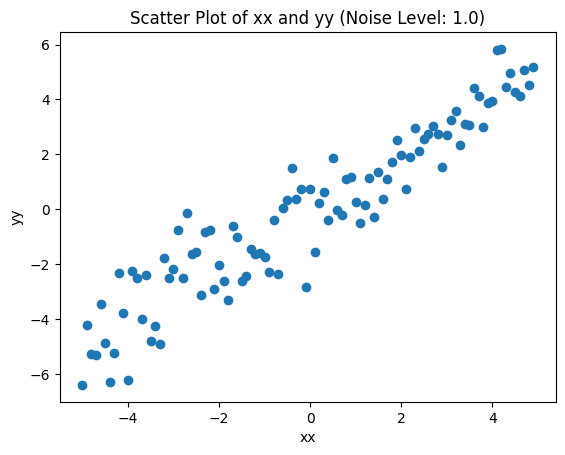

Noise Level: 2.0, Correlation Coefficient: 0.8222457797466131


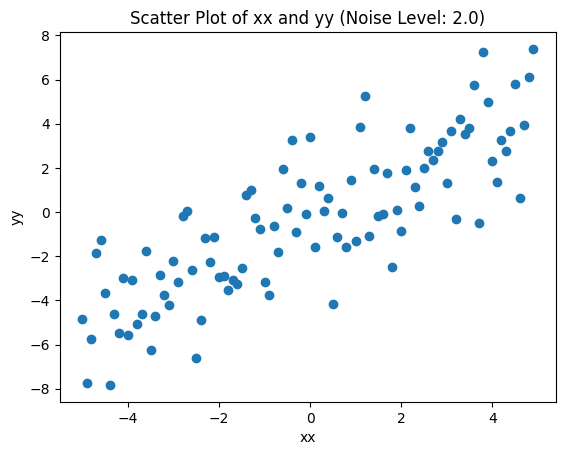

Noise Level: 3.0, Correlation Coefficient: 0.7080673711706241


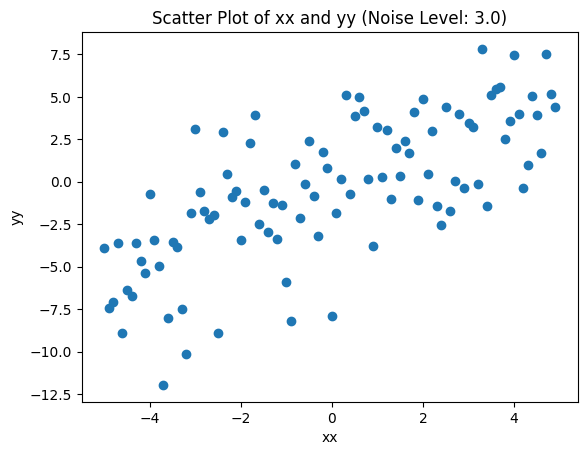

In [ ]:
import scipy
from scipy import stats
xx = np.arange(-5, 5, 0.1)
pp = 1.5
yy = xx + np.random.normal(0, pp, size=len(xx))

# Your code here
correlation_coefficient = scipy.stats.pearsonr(xx, yy)[0]

print("Pearson's-r correlation coefficient:", correlation_coefficient)

# Visualize the data with a scatter plot
plt.scatter(xx, yy)
plt.xlabel("xx")
plt.ylabel("yy")
plt.title("Scatter Plot of xx and yy (Noise Level: {})".format(pp))
plt.show()

noise_levels = [0.5, 1.0, 2.0, 3.0]
for pp in noise_levels:
    yy = xx + np.random.normal(0, pp, size=len(xx))
    correlation_coefficient = scipy.stats.pearsonr(xx, yy)[0]
    print("Noise Level: {}, Correlation Coefficient: {}".format(pp, correlation_coefficient))

    plt.scatter(xx, yy)
    plt.xlabel("xx")
    plt.ylabel("yy")
    plt.title("Scatter Plot of xx and yy (Noise Level: {})".format(pp))
    plt.show()


Pearson's r coefficient is limited to analyse the linear correlation between two variables. It is not capable to show the non-linear dependency. Investigate the Pearson's r coefficient between two variables that are correlated non-linearly.

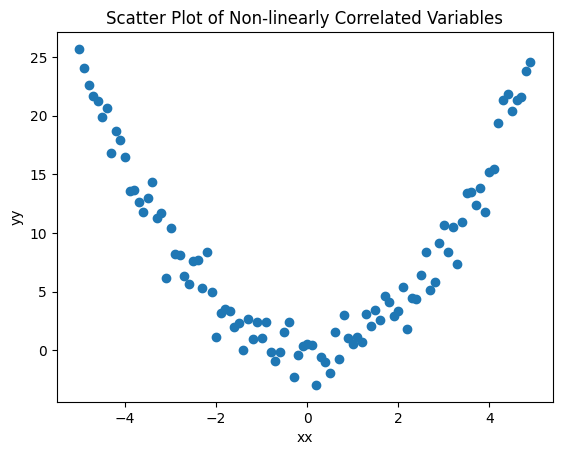

Pearson's r coefficient: -0.045769781306659554


In [ ]:
# generate some data, first for X
xx = np.arange(-5, 5, 0.1)

# assume Y = 2Y + some perturbation
pp = 1.5  # level of noise
yy = xx**2 + np.random.normal(0, pp, size=len(xx))

# Your code here
# Visualize the data with a scatter plot
plt.scatter(xx, yy)
plt.xlabel("xx")
plt.ylabel("yy")
plt.title("Scatter Plot of Non-linearly Correlated Variables")
plt.show()

# Calculate Pearson's r coefficient
correlation_coefficient = scipy.stats.pearsonr(xx, yy)[0]
print("Pearson's r coefficient:", correlation_coefficient)

In [ ]:
# Your code here
# Pearson's coefficient between xx and yy

pearson_coeff = scipy.stats.pearsonr(xx, yy)[0]

print("Pearson's coefficient between xx and yy:", pearson_coeff)


Pearson's coefficient between xx and yy: -0.045769781306659554


---
## <span style="color:#0b486b">9. Spearman's rank coefficient</span>

**Exercise**: Spearman's rank coefficient is used for discrete data. Find the Spearman's rank between horse power and number of cylinders of the car data.

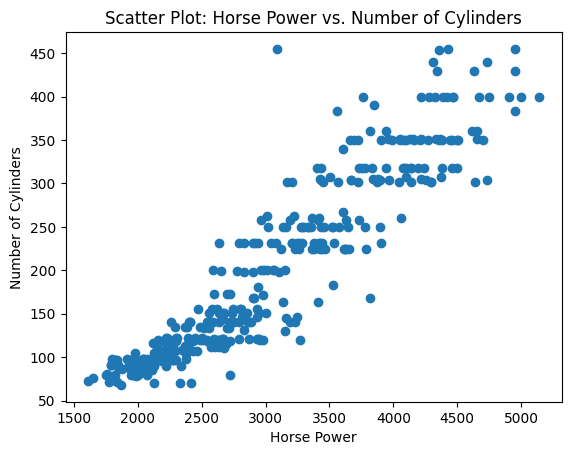

Spearman's rank coefficient: 0.9456303976349775


In [ ]:
horse = np.array([float(dd[4]) for dd in data[1:]])
cylinder = np.array([float(dd[2]) for dd in data[1:]])

# Your code here
# Draw a scatter plot for horse power and the number of cylinders of the cars.

plt.scatter(horse, cylinder)
plt.xlabel("Horse Power")
plt.ylabel("Number of Cylinders")
plt.title("Scatter Plot: Horse Power vs. Number of Cylinders")
plt.show()

spearman_coeff = scipy.stats.spearmanr(horse, cylinder)[0]
print("Spearman's rank coefficient:", spearman_coeff)
